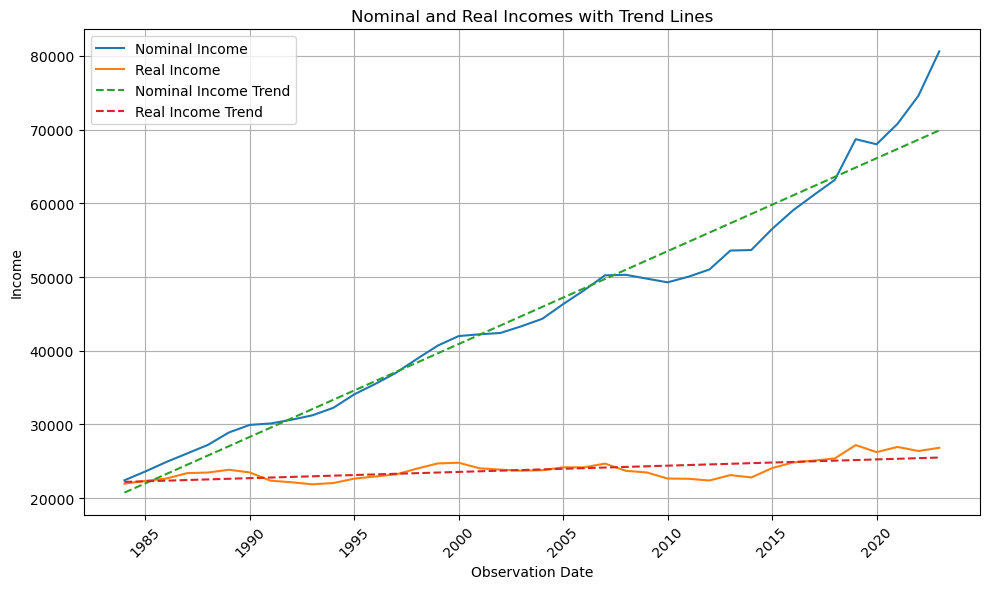

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV files into DataFrames
df1 = pd.read_csv("C:\\Users\\DMS-3573\\Downloads\\CPIAUCSL.csv")
df2 = pd.read_csv("C:\\Users\\DMS-3573\\Downloads\\MEHOINUSA646N.csv")

# Convert 'observation_date' to datetime
df1['observation_date'] = pd.to_datetime(df1['observation_date'])
df2['observation_date'] = pd.to_datetime(df2['observation_date'])

# Merge the DataFrames on the common column 'observation_date'
merged_df = pd.merge(df1, df2, on='observation_date')

# Calculate the price index
# Assuming 'CPIAUCSL' is the column from the first CSV and 'MEHOINUSA646N' is from the second CSV
merged_df['price_index'] = merged_df['MEHOINUSA646N'] / merged_df['CPIAUCSL'] * 100

# Convert nominal income to real income
merged_df['real_income'] = merged_df['MEHOINUSA646N'] / (merged_df['CPIAUCSL'] / 100)

# Plot nominal and real incomes
plt.figure(figsize=(10, 6))
plt.plot(merged_df['observation_date'], merged_df['MEHOINUSA646N'], label='Nominal Income')
plt.plot(merged_df['observation_date'], merged_df['real_income'], label='Real Income')

# Add trend lines
# Convert 'observation_date' to int64 for np.polyfit
date_as_int = merged_df['observation_date'].astype(np.int64) // 10**9

z_nominal = np.polyfit(date_as_int, merged_df['MEHOINUSA646N'], 1)
p_nominal = np.poly1d(z_nominal)
plt.plot(merged_df['observation_date'], p_nominal(date_as_int), linestyle='--', label='Nominal Income Trend')

z_real = np.polyfit(date_as_int, merged_df['real_income'], 1)
p_real = np.poly1d(z_real)
plt.plot(merged_df['observation_date'], p_real(date_as_int), linestyle='--', label='Real Income Trend')

# Customize the plot
plt.xlabel('Observation Date')
plt.ylabel('Income')
plt.title('Nominal and Real Incomes with Trend Lines')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()